## Making fun pictures:
dress (ID 3) 400 - Need 400 more. - 1 transformation / image
<br>
<br>
Pullover (ID 2) - Need 700 more.  7 transformations/image
<br>
<br>
top (ID 0) - Need 799 more.  ~38 transformations / image if we take 20 images from validation set. 1 image with 34 transformations
<br>
<br>
trouser (ID 1) - Need 799 more. ~38 transformations / image. 1 image with 34 transformations

In [9]:
from PIL import Image, ImageEnhance
import skimage
from load_data import load_data 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x_tr, y_tr_df = load_data('x_train.csv', 'y_train.csv')
x_va, y_va_df = load_data('x_valid.csv', 'y_valid.csv')
x_te = load_data('x_test.csv', 'y_valid.csv')[0]

In [85]:
#Scaling images between 0 and 1. Works better with skimage
x_tr_sc=np.divide(x_tr, 255)
x_va_sc = np.divide(x_va, 255)

In [71]:
#getting index for each class in training set:
top_int = y_tr_df.index[y_tr_df['class_name']=='top']    #index 1
trous_int = y_tr_df.index[y_tr_df['class_name']=='trouser']    #index 11
dress_int =(y_tr_df.index[y_tr_df['class_name']=='dress']).tolist()
pull_int =(y_tr_df.index[y_tr_df['class_name']=='pullover']).tolist()
sneaker_int =(y_tr_df.index[y_tr_df['class_name']=='sneaker']).tolist()
sandal_int =(y_tr_df.index[y_tr_df['class_name']=='sandal']).tolist()

In [88]:
#function just to see ONE instance to make sure picture looks as intended.
def show_image(x_set, index, newImg):
    fig, axgrid = plt.subplots(1, 2, figsize=(8, 4))

    ax1 = axgrid[0]
    ax2 = axgrid[1]
    x_SS2 = x_set[index].reshape((28,28))

    #shows the original image
    ax1.imshow(x_SS2, vmin=0, vmax=1, cmap='gray')
    ax1.set_xticks([]); ax1.set_yticks([]);

    #display new image.
    ax2.imshow(newImg, vmin=0, vmax=1, cmap='gray')
    ax2.set_xticks([]); ax2.set_yticks([]);

    plt.tight_layout();
    plt.show();

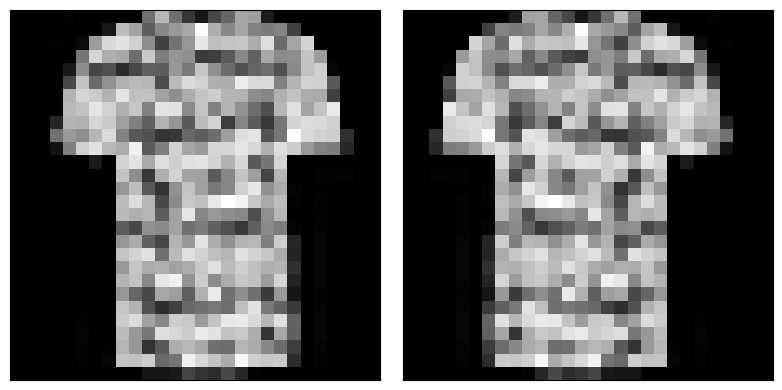

In [89]:
#Flip shirt, just use numpy...
top = (x_tr_sc[top_int]).reshape((28,28))
flip_top = (np.fliplr(top))
show_image(x_tr_sc, top_int, flip_top)

#Flipped image. Also array of new top images
new_tops = flip_top.reshape((1, 784))   #1

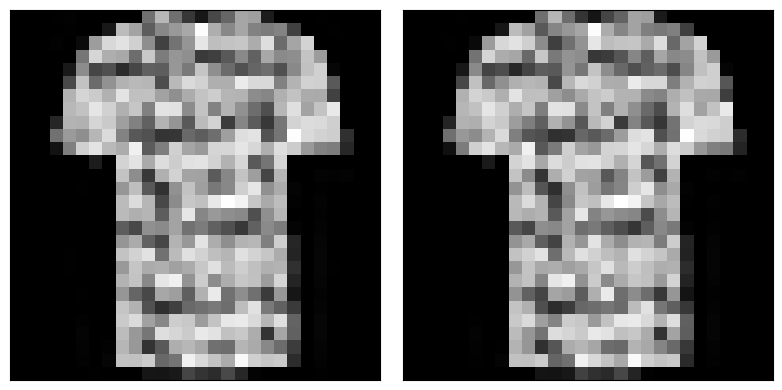

In [90]:
light_top1 = skimage.exposure.adjust_gamma(top, 0.98)   #2
light_top2 = skimage.exposure.adjust_gamma(top, 0.99)   #3
dark_top1 = skimage.exposure.adjust_gamma(top, 1.05)    #4
dark_top2 = skimage.exposure.adjust_gamma(top, 1.03)    #5

show_image(x_tr_sc, top_int, dark_top2)

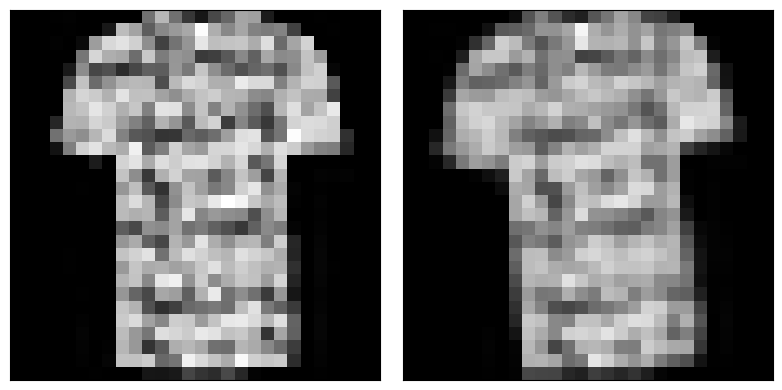

In [95]:
r_top = skimage.transform.rotate(top, 5)
show_image(x_tr_sc, top_int, r_top)

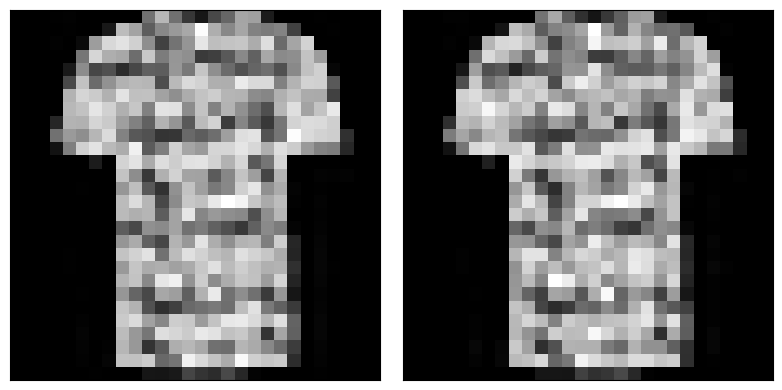

In [106]:
noisy_top1 = skimage.util.random_noise(top, mode='gaussian')
noisy_top2= skimage.util.random_noise(top, mode='localvar')
noisy_top3= skimage.util.random_noise(top, mode='salt')
noisy_top4= skimage.util.random_noise(top, mode='pepper')
noisy_top5= skimage.util.random_noise(top, mode='s&p')
noisy_top6= skimage.util.random_noise(top, mode='speckle')
noisy_top7= skimage.util.random_noise(top, mode='poisson')

show_image(x_tr_sc, top_int, noisy_top7)